In [27]:
import requests
import pandas as pd

# 1. Buscar o JSON bruto
url  = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
resp = requests.get(url)
data = resp.json()

# 2. Desaninhar todas as chaves em colunas planas
df = pd.json_normalize(data)

# 3. Ajustar nomes de colunas (trocando pontos por underline, se preferir)
df.columns = [c.replace('.', '_') for c in df.columns]

# 4. Conferir o resultado
df.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [28]:
# 1. Dimensões e tipos
print("Shape:", df.shape)
df.info()

# 2. Valores ausentes por coluna
print("\nMissing values:")
print(df.isna().sum())

# 3. Estatísticas descritivas das colunas numéricas
print("\nEstatísticas numéricas:")
print(df.describe())

# 4. Estatísticas das colunas categóricas
print("\nEstatísticas categóricas:")
print(df.describe(include=['object','bool']))


Shape: (7267, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       726

In [29]:
import pandas as pd

# 1) Converter TotalCharges para float
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

# 2) Remover eventuais linhas onde TotalCharges virou NaN
df = df.dropna(subset=['account_Charges_Total'])

# 3) “Desenrolar” os valores “No internet service” / “No phone service” como simples “No”
df.replace({
    'No internet service': 'No',
    'No phone service':    'No'
}, inplace=True)

# 4) Mapear as colunas binárias para 0/1
bin_cols = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]
for c in bin_cols:
    df[c] = df[c].map({'Yes': 1, 'No': 0})

# 5) Renomear colunas para simplificar
df.rename(columns={
    'customer_gender':           'gender',
    'customer_SeniorCitizen':    'SeniorCitizen',
    'customer_tenure':           'tenure',
    'account_Charges_Monthly':   'MonthlyCharges',
    'account_Charges_Total':     'TotalCharges'
}, inplace=True)

# 6) One-hot encode das variáveis multiclasse
df = pd.get_dummies(
    df,
    columns=[
        'internet_InternetService',
        'account_Contract',
        'account_PaymentMethod'
    ],
    prefix=['InternetService','Contract','PaymentMethod'],
    drop_first=True
)

# Conferir resultado
print(df.dtypes)
df.head()


customerID                                object
Churn                                    float64
gender                                    object
SeniorCitizen                              int64
customer_Partner                           int64
customer_Dependents                        int64
tenure                                     int64
phone_PhoneService                         int64
phone_MultipleLines                        int64
internet_OnlineSecurity                    int64
internet_OnlineBackup                      int64
internet_DeviceProtection                  int64
internet_TechSupport                       int64
internet_StreamingTV                       int64
internet_StreamingMovies                   int64
account_PaperlessBilling                   int64
MonthlyCharges                           float64
TotalCharges                             float64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year   

,customerID,Churn,gender,SeniorCitizen,customer_Partner,customer_Dependents,tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,...,account_PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,0,...,1,65.6,593.30,False,False,True,False,False,False,True
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,0,...,0,59.9,542.40,False,False,False,False,False,False,True
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,0,...,1,73.9,280.85,True,False,False,False,False,True,False
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,0,...,1,98.0,1237.85,True,False,False,False,False,True,False
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,0,...,1,83.9,267.40,True,False,False,False,False,False,True


Churn rate por número de add-ons:
num_addons
0    0.215
1    0.458
2    0.358
3    0.274
4    0.224
5    0.125
6    0.053
Name: Churn, dtype: float64


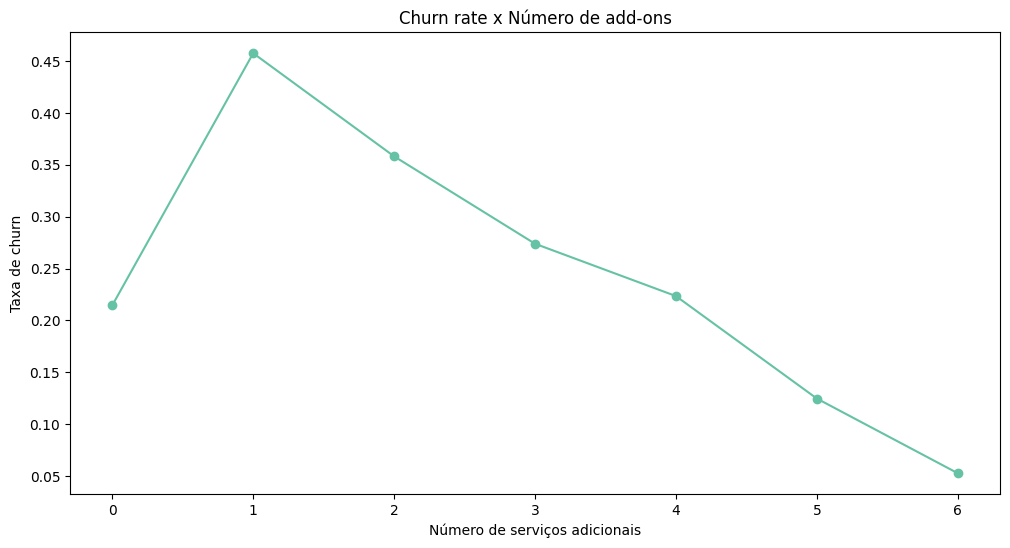

In [40]:
import matplotlib.pyplot as plt

# 1) Definir lista de colunas de add-ons
add_ons = [
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

# 2) Criar nova coluna com a soma dos serviços adicionais
df['num_addons'] = df[add_ons].sum(axis=1)

# 3) Calcular churn rate por número de add-ons
addon_churn = df.groupby('num_addons')['Churn'].mean()

print("Churn rate por número de add-ons:")
print(addon_churn.round(3))

# 4) Plotar a curva de churn vs. num_addons
plt.figure()
plt.plot(addon_churn.index, addon_churn.values, marker='o')
plt.xlabel('Número de serviços adicionais')
plt.ylabel('Taxa de churn')
plt.title('Churn rate x Número de add-ons')
plt.xticks(addon_churn.index)
plt.show()
